In [241]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

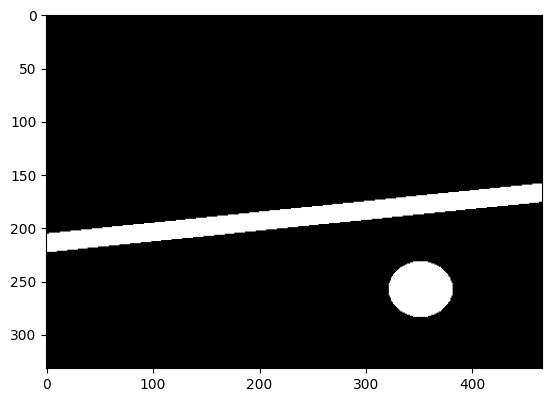

In [242]:
def display_img(img):
    new_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.show()

img = cv2.imread('./downloads/p5.png')
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# extrract red
hsv_lower = np.array([0,150,50])
hsv_upper = np.array([10,255,255])
image = cv2.inRange(hsv_image, hsv_lower, hsv_upper)

display_img(image)


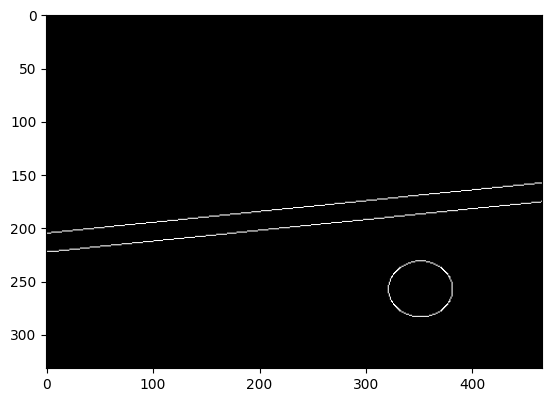

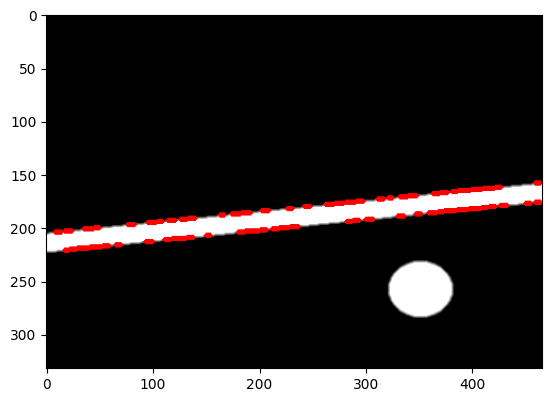

In [243]:
#img = cv2.imread('./downloads/p6.png')
image=cv2.GaussianBlur(image,(3,3),100)
#plt.imshow(image)
#plt.show()
# Convert to grayscale
new_img= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
# Apply one shot filter
canny = cv2.Canny(gray,5, 60)
# Show image
plt.imshow(canny, cmap='gray')
plt.show()
# Apply hough transform
lines = cv2.HoughLinesP(canny, 1, np.pi/180,50)
# Draw lines
#lines = None
if lines is not None:
 for line in lines:
    #print(line)
    x0, y0, x1, y1 = line[0]
    cv2.line(new_img, (x0, y0), (x1, y1), (255, 0, 0), 3)
# Show image
plt.imshow(new_img)
plt.show()

In [244]:

def detect_red_line(image):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Create a mask for the red pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Find the contours of the red pixels
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if there are any contours
    if len(contours) == 0:
         return None
    # Find the longest contour, which is likely to be the red line
    longest_contour = max(contours, key=cv2.contourArea)

    # Fit a line to the longest contour
    line_params = cv2.fitLine(longest_contour, cv2.DIST_L2, 0, 0.01, 0.01)

    # Calculate the distance from the bottom border of the image
    y_intercept = line_params[3]
    distance = image.shape[0] - y_intercept

    return distance


#image = cv2.imread('./downloads/p6.png')

distance = detect_red_line(new_img)
if distance is not None:
    print('There is red line in the image.')
    print('The distance from the bottom border of the image is', distance, 'pixels.')
else:
    print('There is no red line in the image.')


There is red line in the image.
The distance from the bottom border of the image is [149.8158] pixels.
